In [2]:
import numpy as np 
import pandas as pd
import pylab as pl 
import itertools
import scipy.stats


%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Goals:

(all simulated data)

* Generate N samples from a distribution of your choice (not Gaussian) and calculate the mean of each sample (all samples should have the same size n).

* Assess the validity of the Z-test 
    * If the samples are drawn from the distribution you are testing, the z-values you calculate should follow a N(0,1) distribution. 
    * Show the distribution of z -statistics is indeed consistent with N(0,1).

In [3]:
# set seed 
np.random.seed(1000)

In [4]:
# generate N = 1000 samples of poisson distribution, each with sample size n = 1000
poisson = np.empty(1000, dtype=list)
n = 10000
mean = 100

for i in range(1000): 
    poisson[i] = np.random.poisson(mean, size = n)

In [5]:
# calculate all means 
allmeans = list(map(lambda x: x.mean(), poisson))

In [6]:
# calculate population mean and population standard deviation 
allpoisson = list(itertools.chain.from_iterable(poisson))
pop_mean = np.mean(allpoisson)
pop_std = np.std(allpoisson)

In [7]:
all_z = list(map(lambda x: (x - pop_mean)*np.sqrt(10000) / pop_std, allmeans))

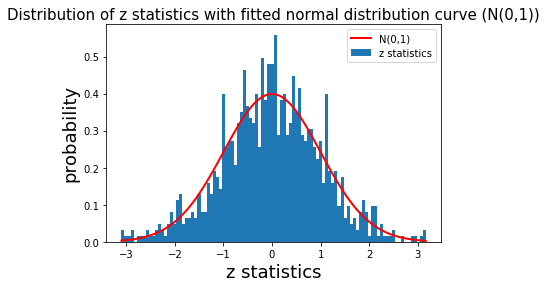

In [23]:
xmin, xmax = pl.xlim()
x = np.linspace(min(all_z), max(all_z), 100)
p = scipy.stats.norm.pdf(x, 0, 1)

pl.hist(all_z,bins=100, normed=True, label='z statistics')
pl.plot(x, p, 'k', linewidth=2, color = 'red', label='N(0,1)')
pl.xlabel('z statistics', fontsize = 18)
pl.ylabel('probability', fontsize = 18)
pl.title('Distribution of z statistics with fitted normal distribution curve (N(0,1))', fontsize = 15)
pl.legend()

pl.show()

##### Null hypothesis: the distribution of z statistics is the same with the normal distribution (N(0,1)).
alpha = 0.05

In [18]:
scipy.stats.kstest(all_z, 'norm')

KstestResult(statistic=0.016864519347300377, pvalue=0.93858608667266774)

From above ks-test, we can see pvalue is large, we fail to reject null hypothesis, hence the z statistics we generated above follow the normal distribution (N(0,1))